<Html>
    <body>
        <h1>Stock Market Prediction</h1><br>
        <p>Have you ever wondered what would happen if one could actually predict the stock market and tell what would happen in the upcomming days.<br>
        Thinking about stock market prediction one could always question how is it possible to predict stock market.<br>
        Let me clear your confusion.<br>
        One just cannot predict the stock market with a 100% surity about whats coming next but that is the thing what all the big data scientist are currently working on. <br>
        We can actually predict what could possibly happen based on the current trend of hoe the company is growing and how well it is performing in the market by analysing the charts and using mathematical models converting it into codes and then showing the output<br>
        In this Project I tried to do the same and predict the Stock Market of some of the tech Giants accross the globe<br></p>
    </body>
</html>

In [1]:
from __future__ import division

In [2]:
# For Data Processing
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# For reading stock data from yahoo
from pandas_datareader import DataReader
from pandas import Series, DataFrame

In [4]:
#Extrating dataset from Yahoo Finance
#List of Tech campanies stocks for analytics
tech_list = ['AAPL','GOOGL','MSFT','AMZN']
end = datetime.datetime.now()
start = datetime.datetime(end.year-1,end.month,end.day)

# Set DataFrame as the Stock Ticker
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [5]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-02,93.970001,91.500000,93.639999,91.779999,47867800.0,90.218201
2018-02-05,93.239998,88.000000,90.559998,88.000000,51031500.0,86.502533
2018-02-06,91.480003,85.250000,86.889999,91.330002,67998600.0,89.775864
2018-02-07,91.769997,89.199997,90.489998,89.610001,41107600.0,88.085136
2018-02-08,89.879997,84.760002,89.709999,85.010002,55628700.0,83.563408


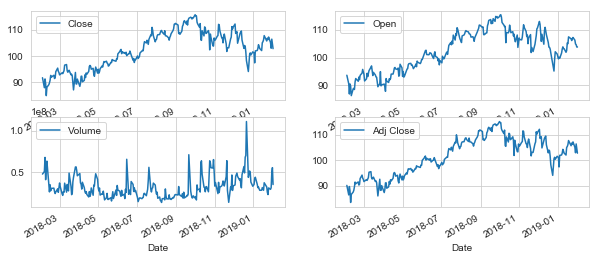

In [6]:
#ploting all the columns of My Dataset 
plt.figure()
plt.subplot(2,2,1)
MSFT['Close'].plot(legend=True, figsize=(10,4))
plt.subplot(222)
MSFT['Open'].plot(legend=True, figsize=(10,4))
plt.subplot(223)
MSFT['Volume'].plot(legend=True, figsize=(10,4))
plt.subplot(224)
MSFT['Adj Close'].plot(legend=True, figsize=(10,4))

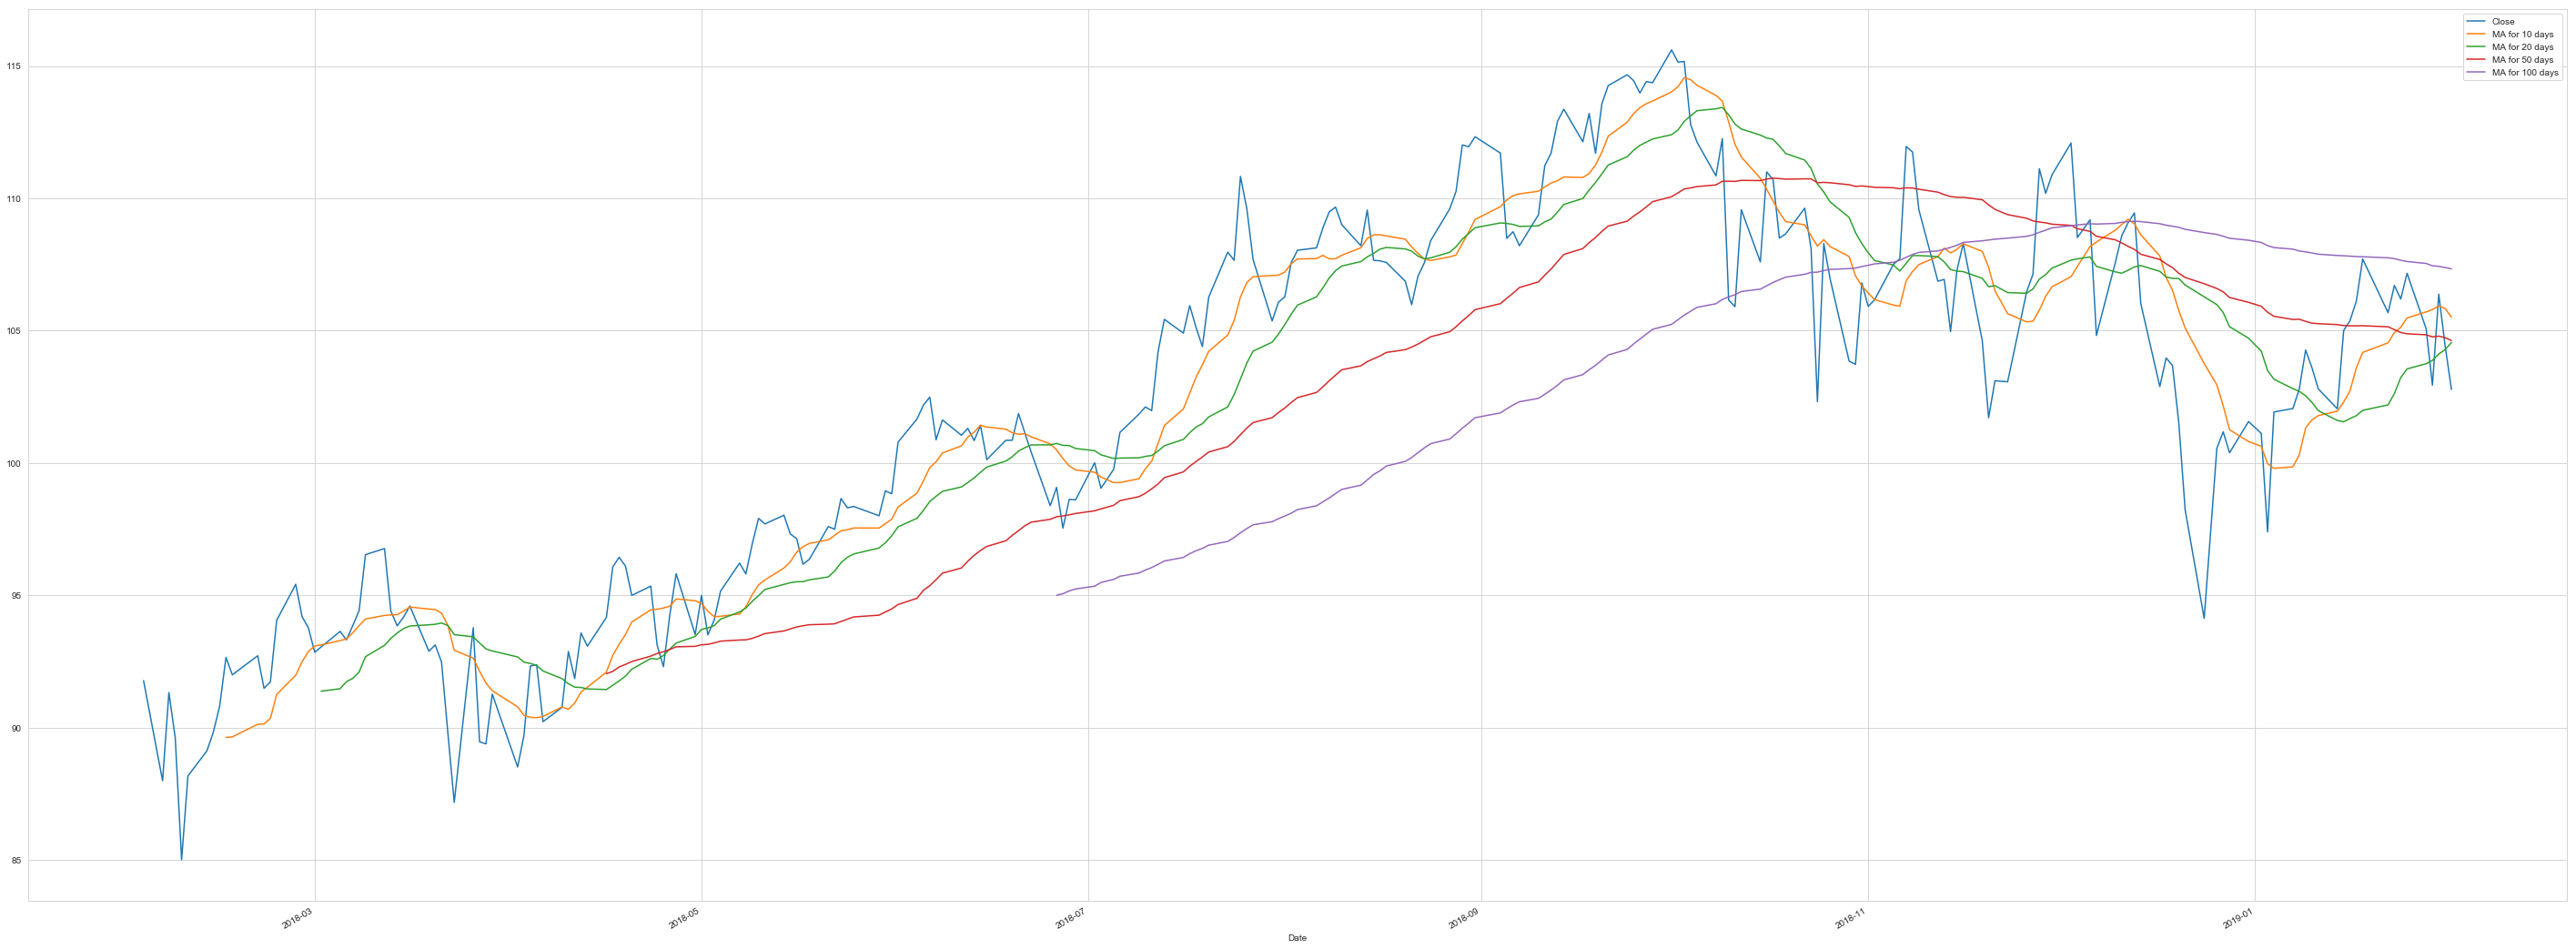

In [7]:
#1 Moving Average(MA)
MA_day = [10,20,50,100]
for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    MSFT[column_name] = moving_avg = MSFT['Close'].rolling(ma).mean()  #pd.rolling_mean(AAPL['Close'],ma)
    
MSFT[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(50,20))

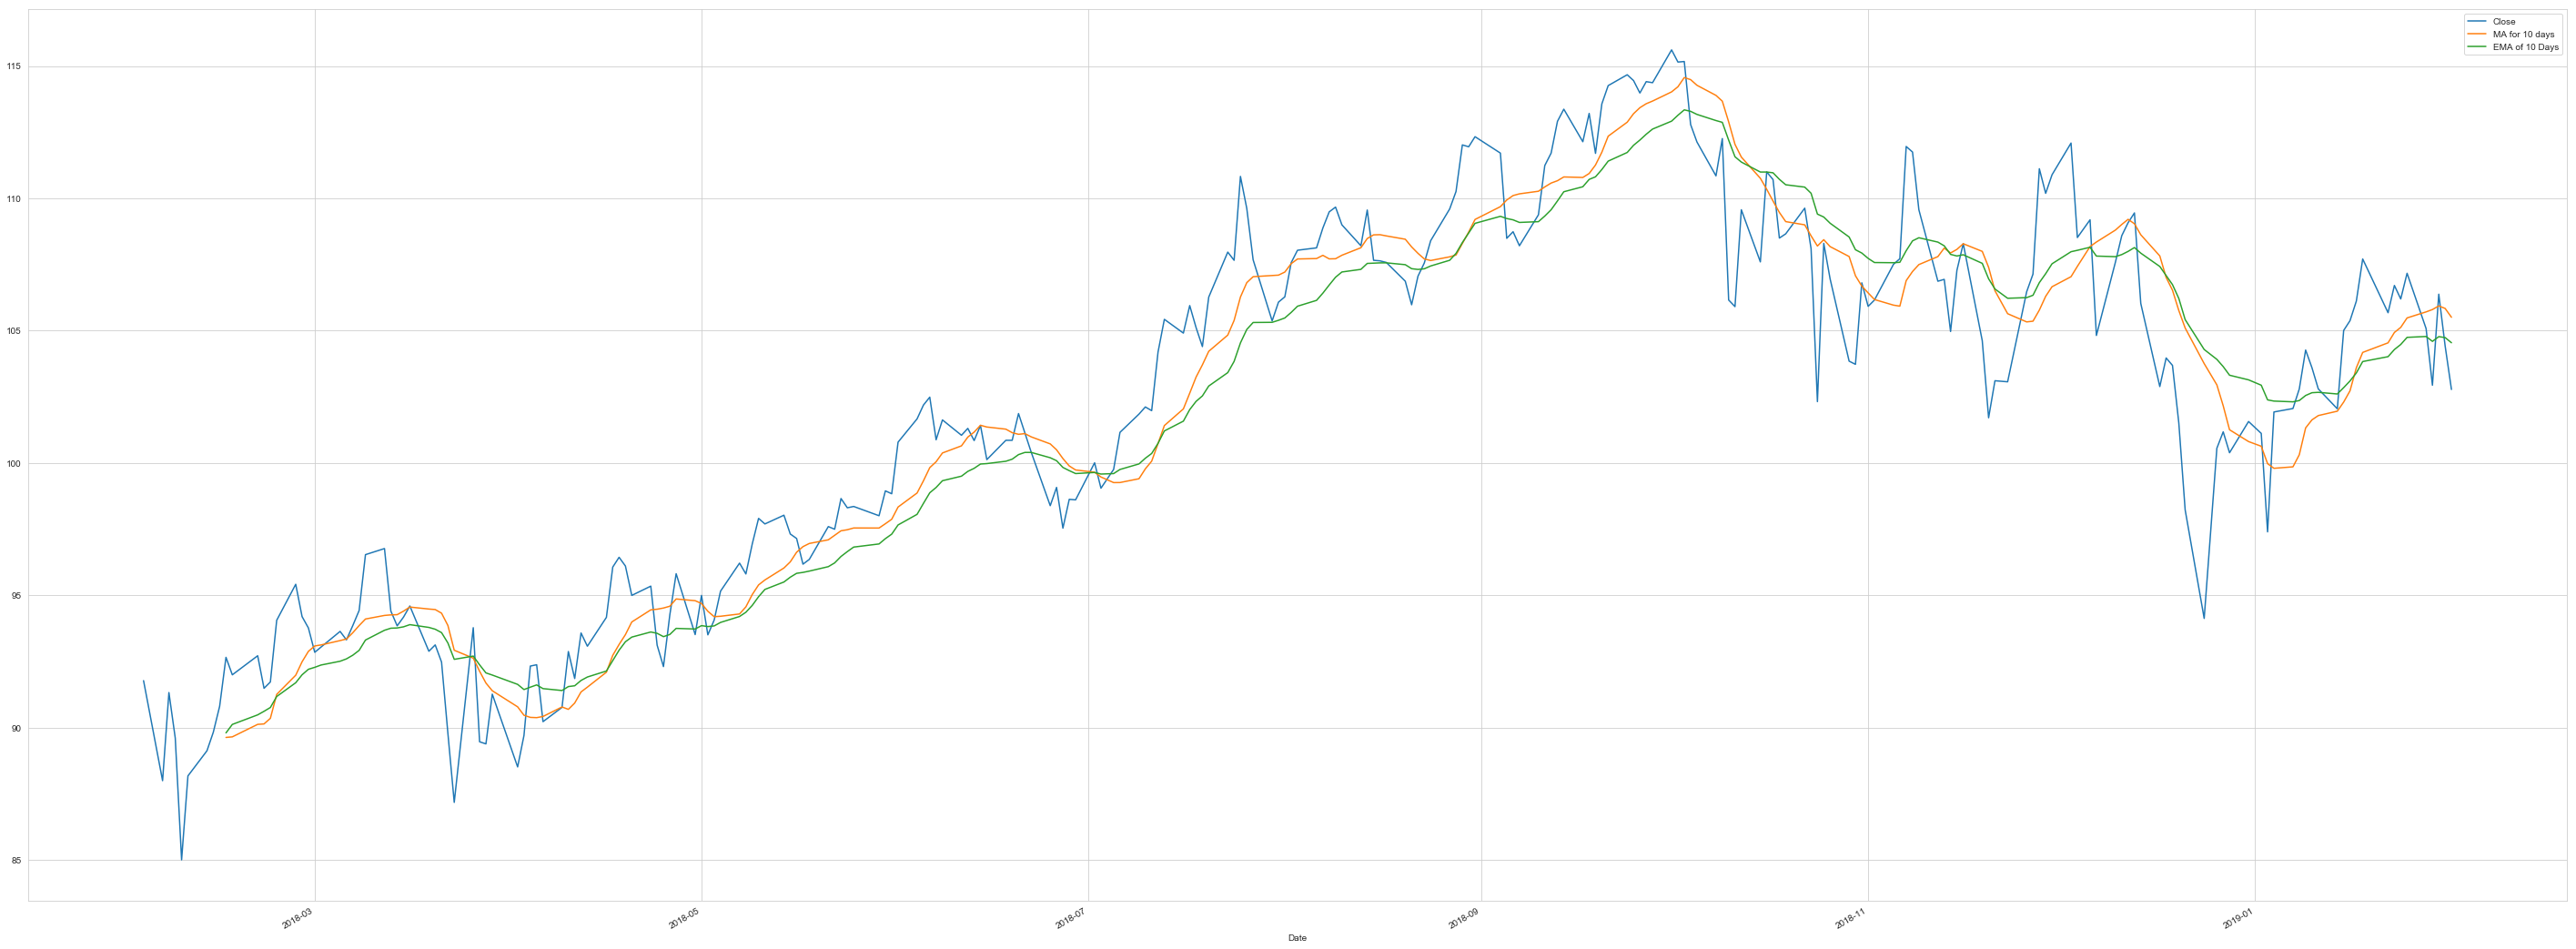

In [8]:
#2 Exponential Moving Average (EMA)
emaPeriod = 10
MSFT['EMA of 10 Days'] = MSFT['Close'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
MSFT[['Close','MA for 10 days','EMA of 10 Days']].plot(subplots=False,figsize=(50,20))

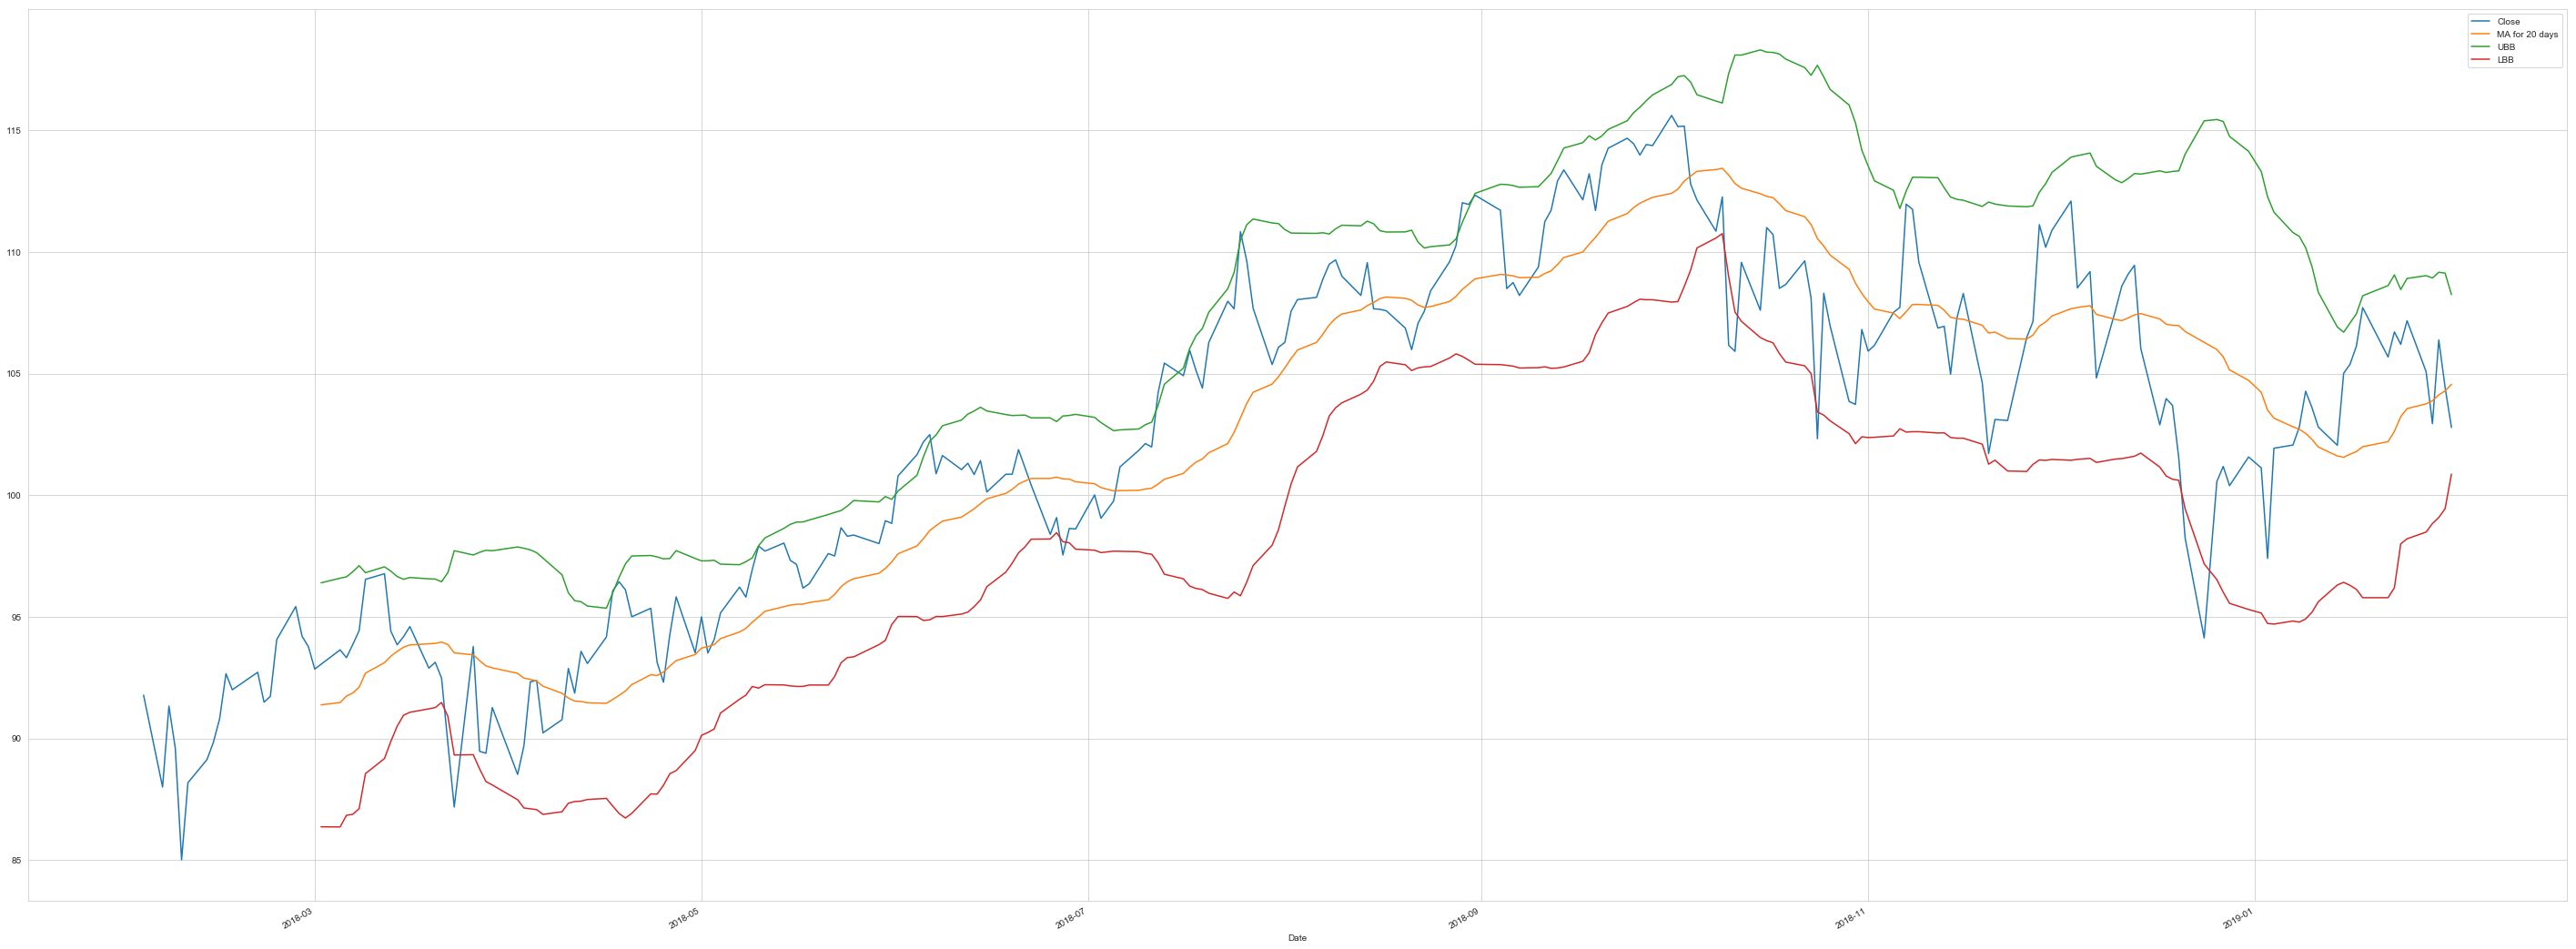

In [9]:
#3 Bollinger Bands (BB)
SD = MSFT['Close'].rolling(20).std()
MSFT['UBB'] = MSFT['MA for 20 days'] + (2*SD)
MSFT['LBB'] = MSFT['MA for 20 days'] - (2*SD)
MSFT[['Close','MA for 20 days','UBB','LBB']].plot(subplots=False,figsize=(50,20))

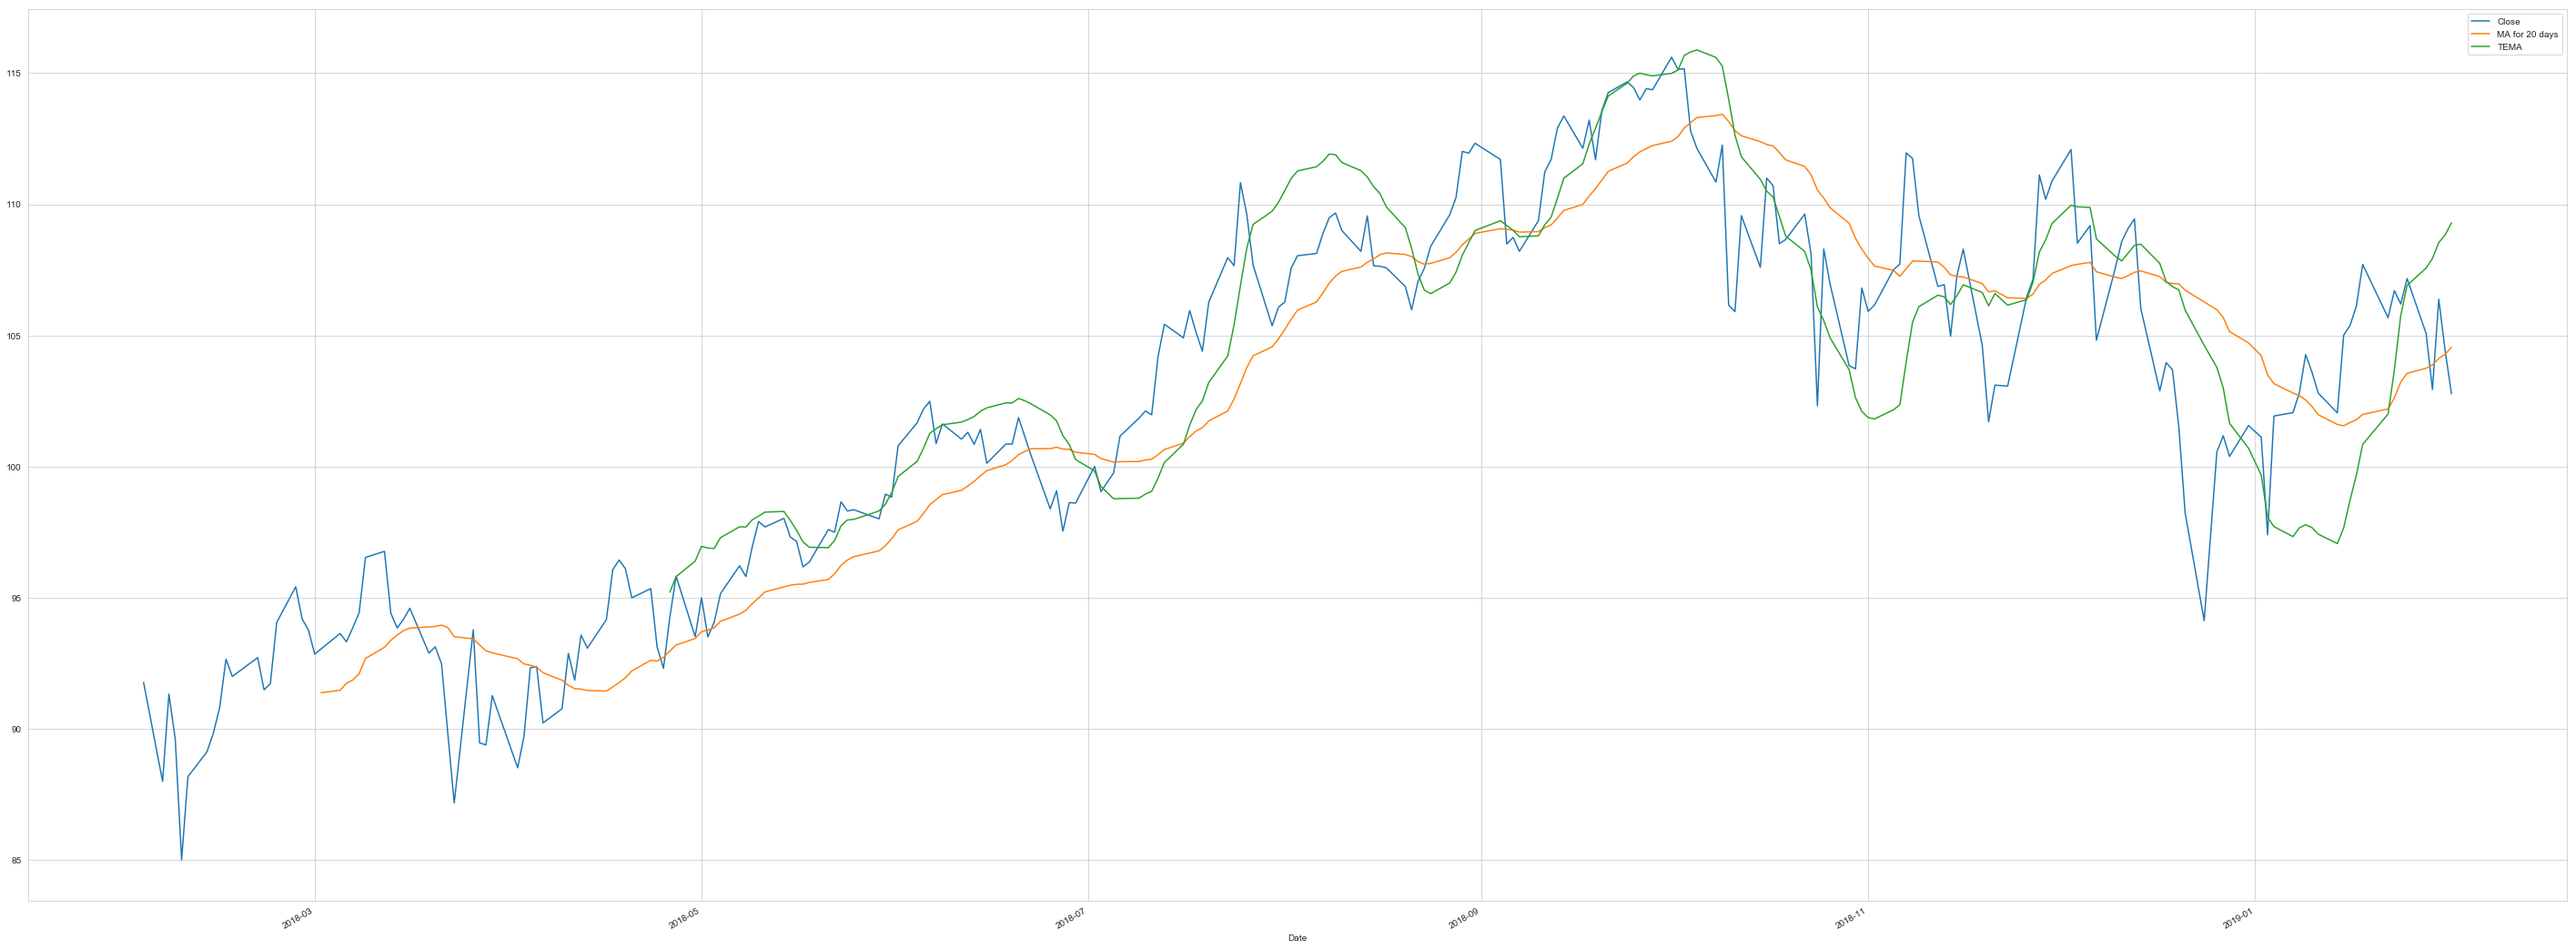

In [10]:
#4 Triple Exponential Moving Average (TEMA)
MSFT['MA2'] = MSFT['MA for 20 days'].rolling(20).mean()
MSFT['MA3'] = MSFT['MA2'].rolling(20).mean()
MSFT['TEMA'] = 3*MSFT['MA for 20 days'] - 3*MSFT['MA2'] + MSFT['MA3']
MSFT[['Close','MA for 20 days','TEMA']].plot(subplots=False,figsize=(50,20))

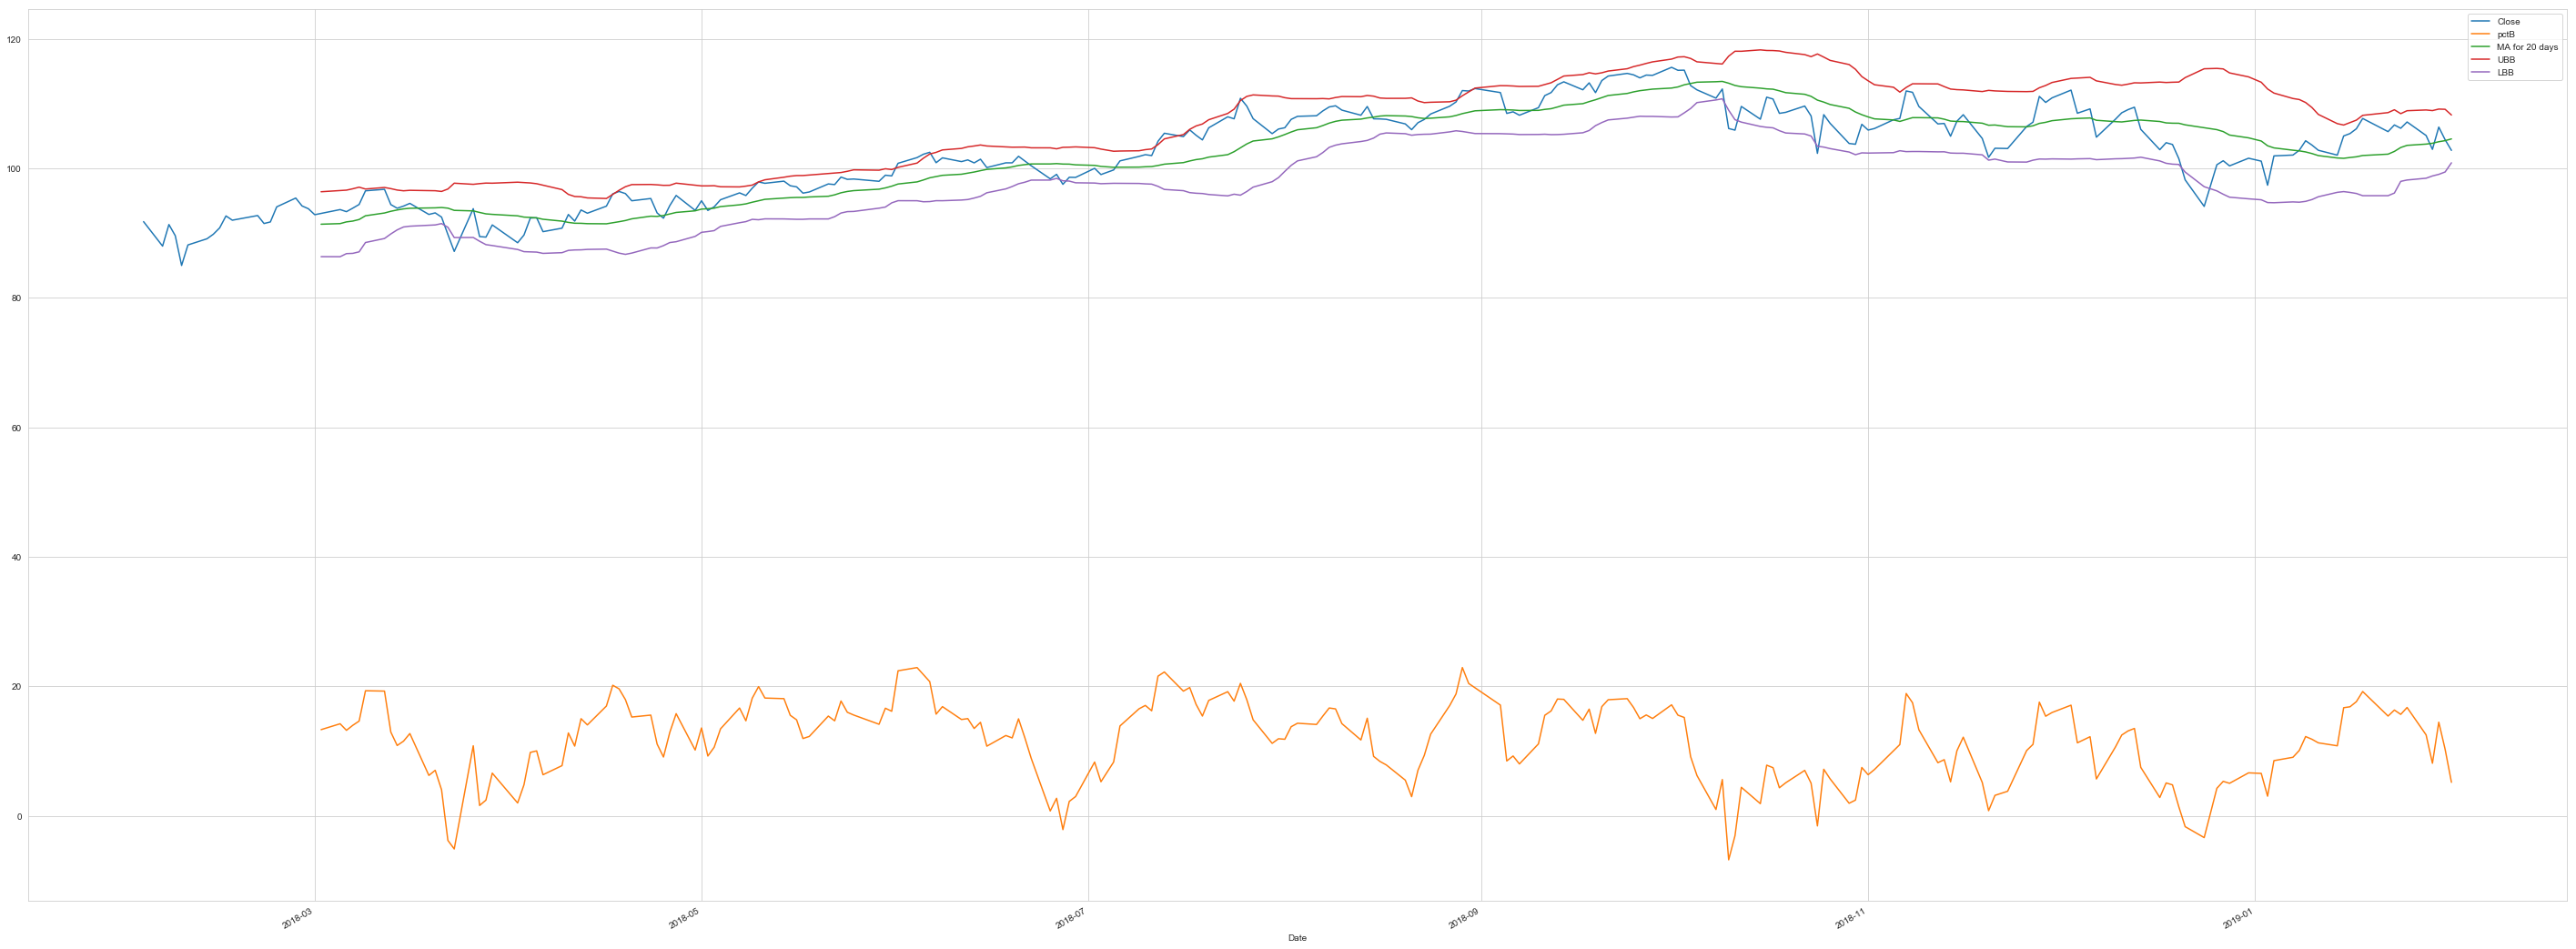

In [11]:
#5 %b
MSFT['pctB'] = 20 * (MSFT['Close'] - MSFT['LBB']) / (MSFT['UBB'] - MSFT['LBB'])
MSFT[['Close','pctB','MA for 20 days','UBB','LBB']].plot(subplots=False,figsize=(50,20))

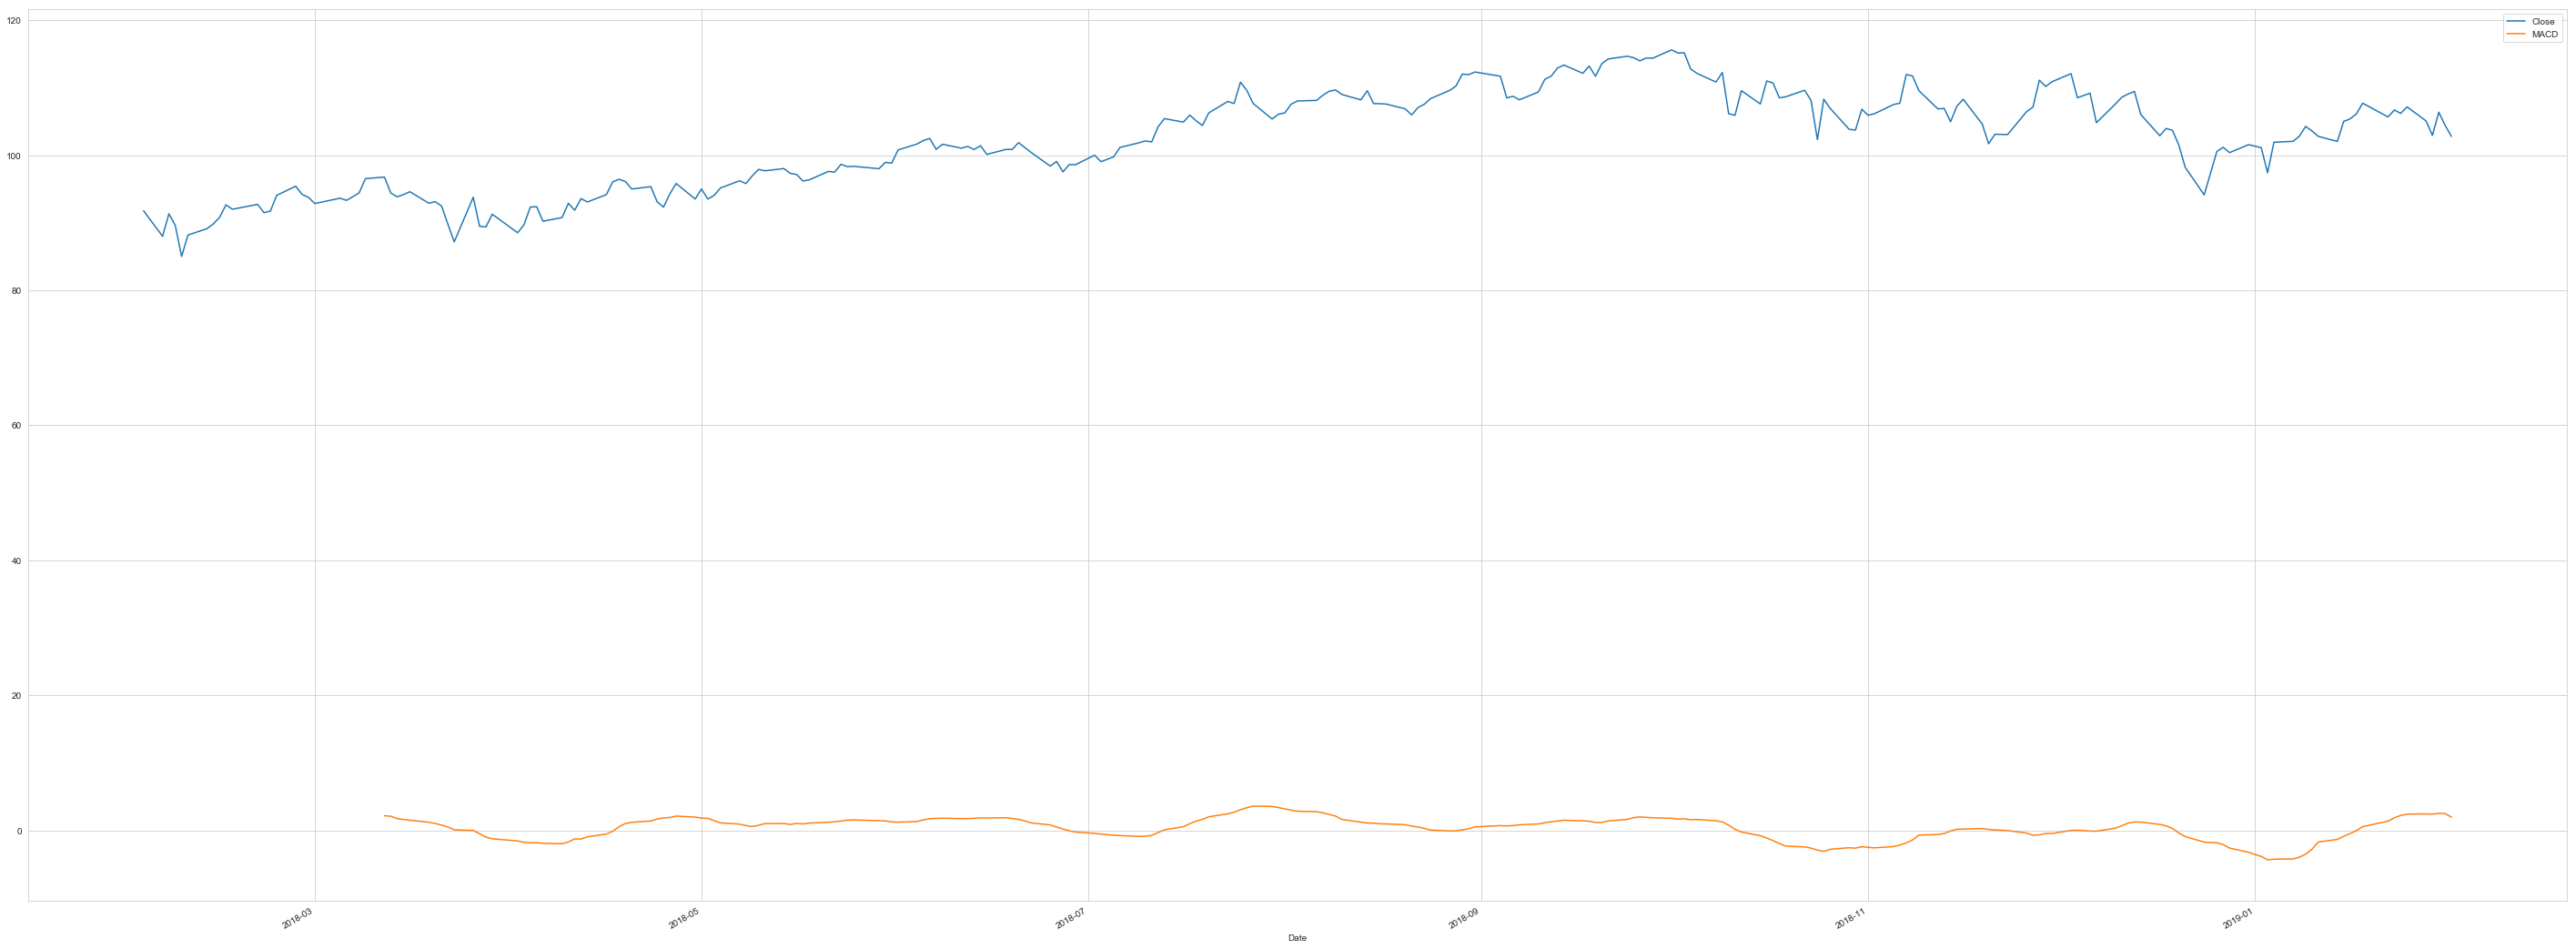

In [12]:
#6 Moving Average Convergence/Divergence (MACD)
MA12 = MSFT['Close'].rolling(12).mean()
MA26 = MSFT['Close'].rolling(26).mean()
MACD = MA12 - MA26
MSFT['MACD'] = MACD
MSFT[['Close','MACD']].plot(subplots=False,figsize=(50,20))

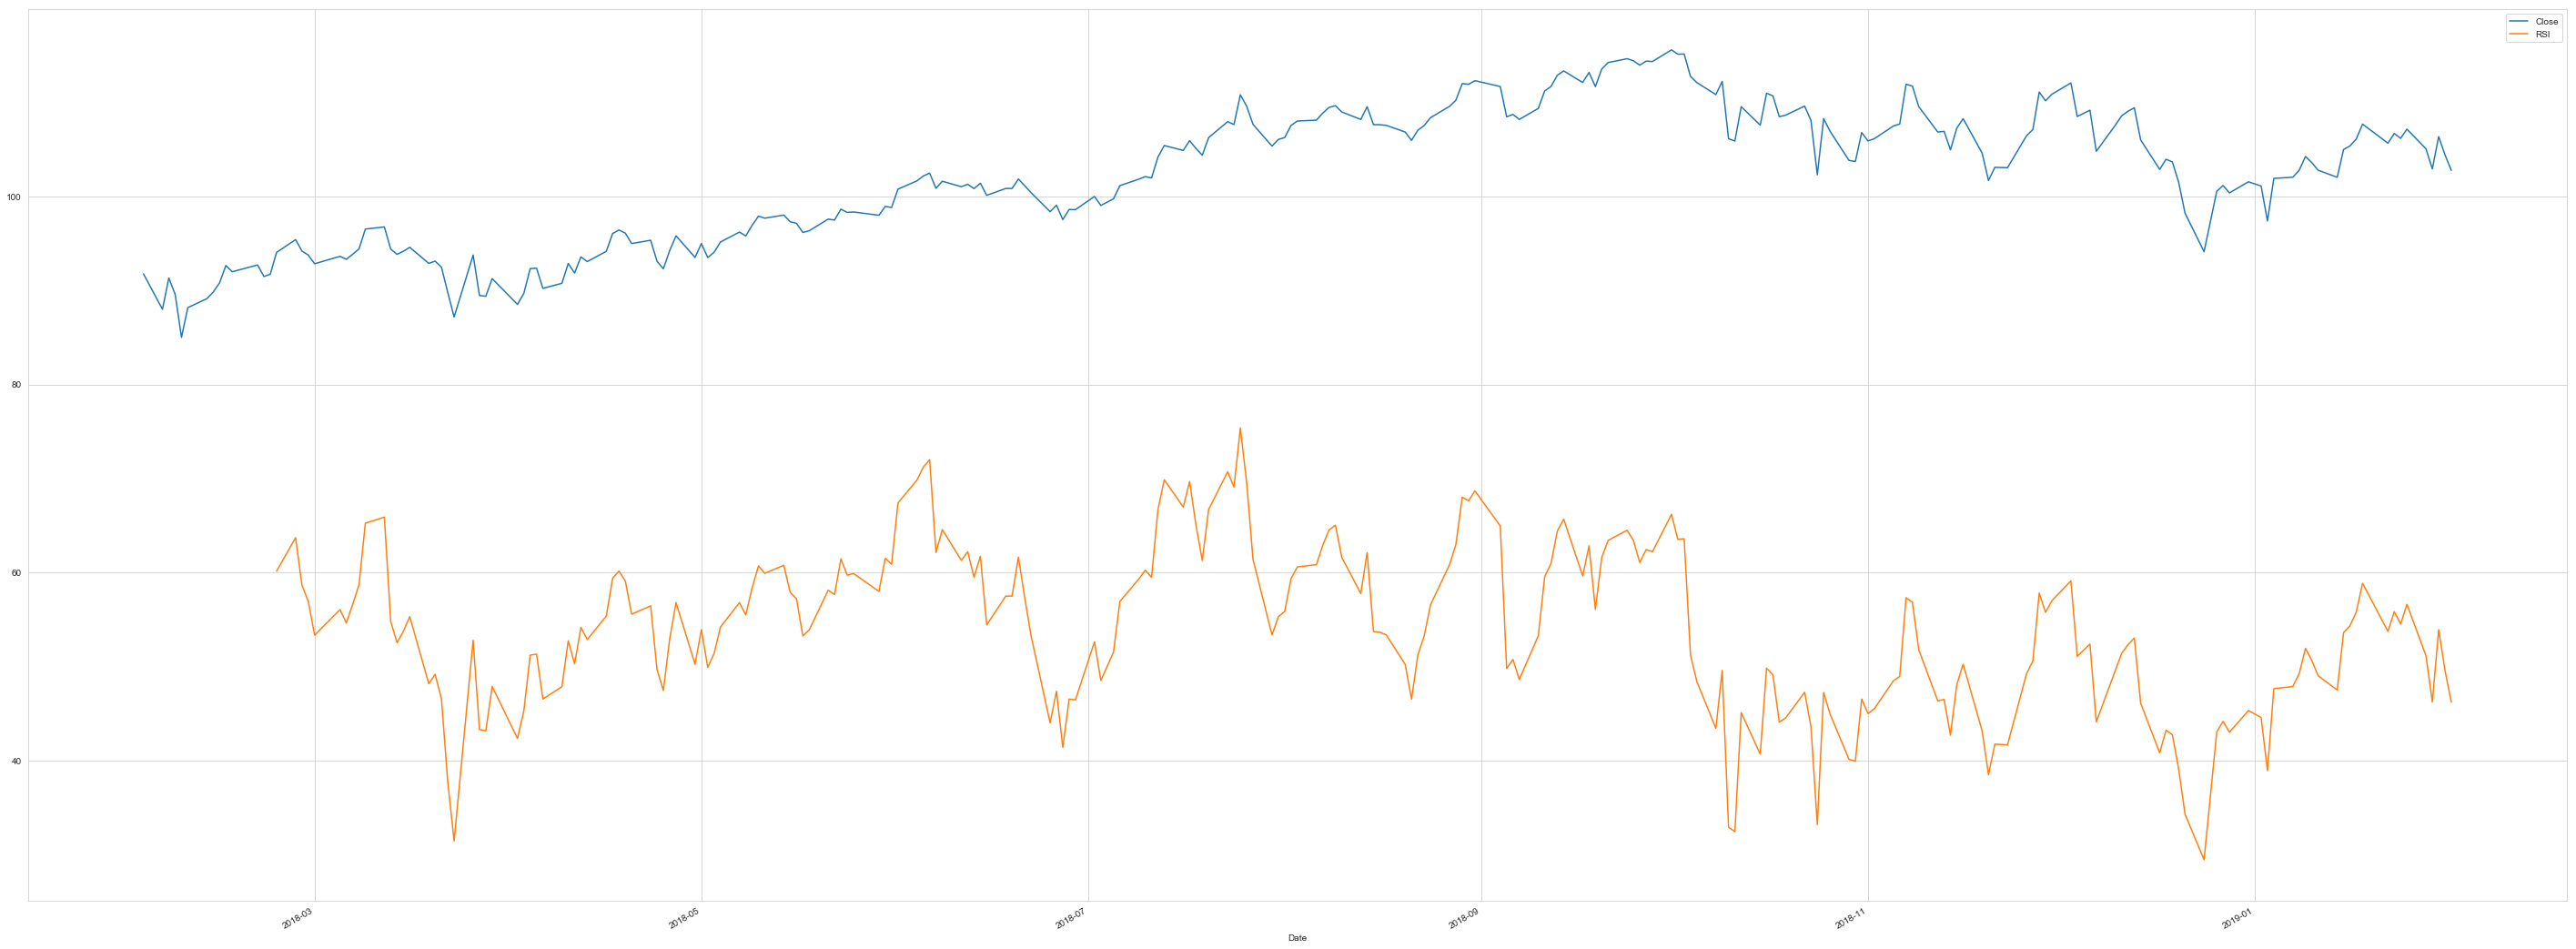

In [13]:
#7 Relative Strength Index (RSI)
rsiVal=14
diffrence = MSFT['Close'].diff()
gain = diffrence.mask(diffrence < 0, 0) 
loss = diffrence.mask(diffrence > 0, 0) 
avgGain = gain.ewm(com=rsiVal-1 ,min_periods=rsiVal).mean()
avgLoss = loss.ewm(com=rsiVal-1 ,min_periods=rsiVal).mean()
rs = abs(avgGain/avgLoss)
rsi = 100*(rs/(1+rs))
MSFT['RSI'] = rsi
MSFT[['Close','RSI']].plot(subplots=False,figsize=(50,20))

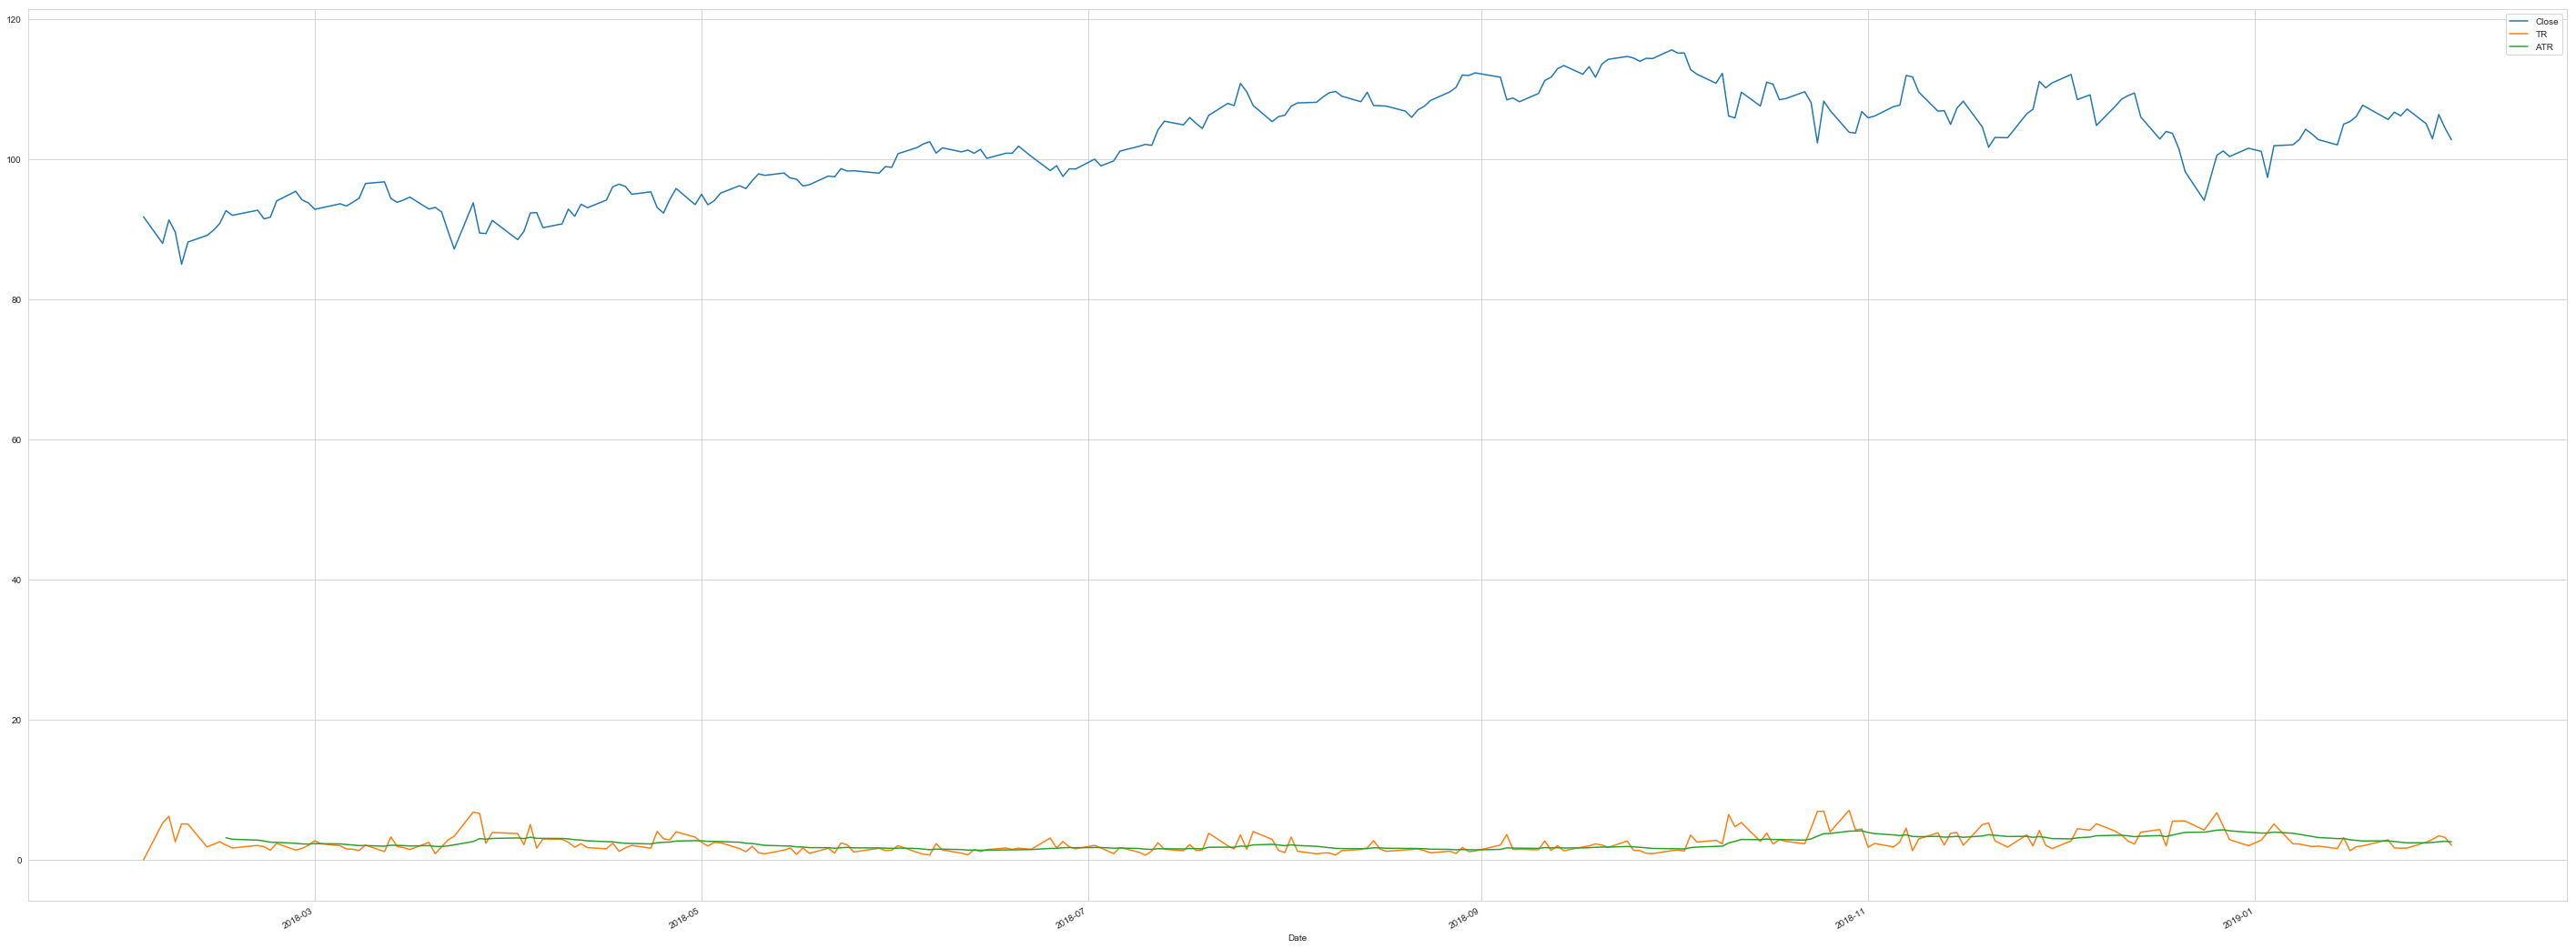

In [14]:
#8 Average True Range (ATR) : measure of Volitality
def TRange(h,l,yc):
    x=h-l
    y=abs(h-yc)
    z=abs(l-yc)
    if y <= x >= z:
        TR = x
    elif x <= y >=z:
        TR = y
    elif x <= z >=y:
        TR = z
    return TR
x=1
TrueRange = []
TrueRange.append(0)
while x < len(MSFT['Close']):
    TR = TRange(MSFT['High'][x],MSFT['Low'][x],MSFT['Close'][x-1])
    TrueRange.append(TR)
    x = x+1
MSFT['TR'] = TrueRange
MSFT['ATR'] = MSFT['TR'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
MSFT[['Close','TR','ATR']].plot(subplots=False,figsize=(50,20))